# Dataset
## The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

You can check and download the dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html)

## Loading Dataset Into Memory

Wrote my own ImageDataLoader Class that is extendible to support multiple datasets in the future as well.
It loads the dataset using the directory path, and returns four results: **train_X, train_y , test_X , test_y** 

Although clustering does not make use of the labels since this is an unsupervised learning algorithm.
This is intended to support a general case ImageDataLoader not specifically built for the image clustering problem. 

In [1]:
from data_loader import ImageDataLoader
data_loader = ImageDataLoader()
train_X, train_y , test_X , test_y = data_loader.load_cifar10("./cifar-10-batches-py", num_batches = 5)

100%|██████████| 5/5 [00:00<00:00, 23.33it/s]


## Clustering Using KMeans

The purpose of K-means is to **identify groups**, or clusters of data points in a multidimensional space. The number K in K-means is the number of clusters to create. Initial cluster means are usually chosen at random.

K-means is usually implemented as an **iterative procedure** in which each iteration involves two successive steps. The first step is to assign each of the data points to a cluster. The second step is to modify the cluster means so that they become the mean of all the points assigned to that cluster.

The **quality** of the current assignment is given by the **distortion measure** which is the sum of squared distances between each cluster centroid and points inside the cluster.

In [ ]:
from kmeans import KMeans 
num_clusters = 3
model = KMeans(num_clusters= num_clusters)
model.fit(train_X)

### Evaluting the fitted model

In [3]:
print("The Model needed ",model.iter_num_," iterations to converge.")
print("The Model scored ",model.distoration_measure_," for the distoration measure value.")

The Model needed  47  iterations to converge.
The Model scored  574559070.1893139  for the distoration measure value.


### Visualizing the fitted model
Plotting the cluster centroids.

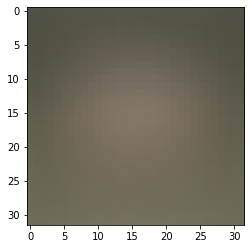

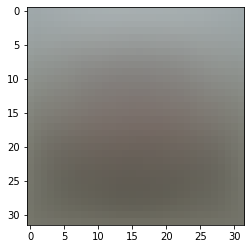

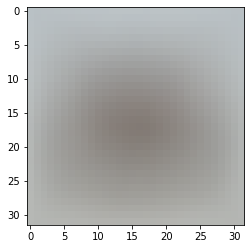

In [4]:
import matplotlib.pyplot as plt
for centroid in model.centroids_:
    centroid = centroid.transpose((1,2,0)).astype(int)
    plt.figure()
    plt.imshow(centroid)

### Visualizing the fitted model
Plotting cluster representatives of each cluster.

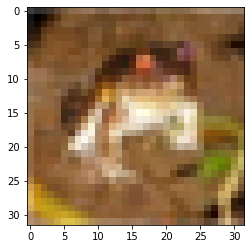

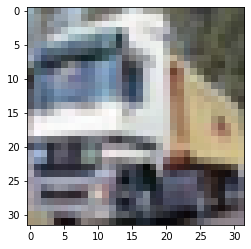

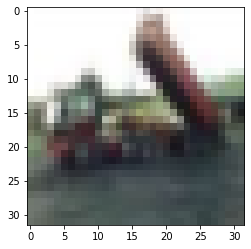

In [5]:
import matplotlib.pyplot as plt
import numpy as np
cluster_representatives_index = np.unique(model.cluster_labels_, return_index=True)[1]
for cluster in range(cluster_representatives_index.shape[0]):  
    plt.figure()
    plt.imshow(train_X[cluster].transpose((1,2,0)))

### Visualizing the fitted model
Plotting measure vs iteration histories of the kmeans run.

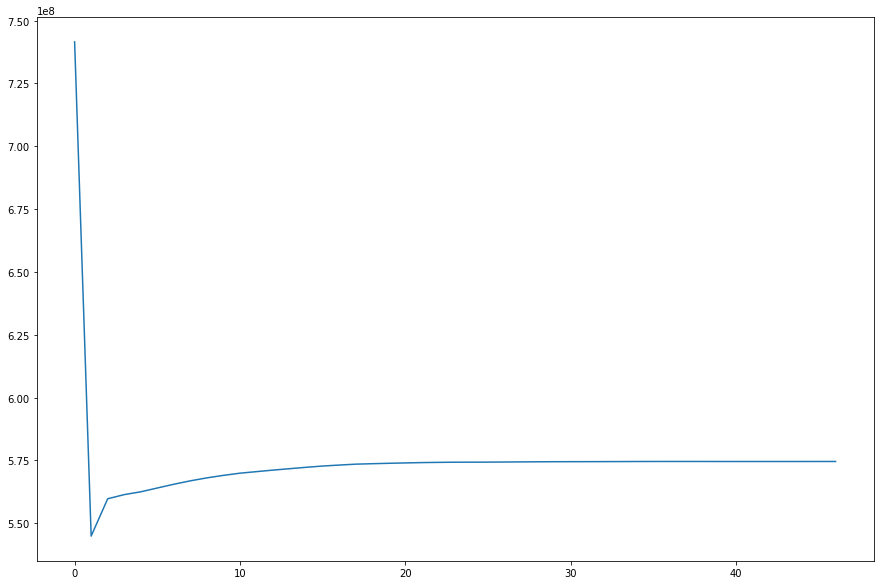

In [6]:
model.plot_measure_vs_iteration()

### Advanced Experiments: Trying out re-running Kmeans with more K values = [3, 5, 10, 15]

In [ ]:
models = []
for num_clusters_trial in [3,5,10,15]:
    model = KMeans(num_clusters= num_clusters_trial)
    model.fit(train_X)
    models.append(model)

#### Evaluating the expriement results: 
    Model 1 with K=3 has the minimum distoration measure score. 
    Also, we notice that the results are widely different in case of changing K values.

****** Model 1 , K =  3  ******
The Model needed  46  iterations to converge.
The Model scored  574655678.0976384  for the distoration measure value.
****** Model 2 , K =  5  ******
The Model needed  91  iterations to converge.
The Model scored  983004461.6394705  for the distoration measure value.
****** Model 3 , K =  10  ******
The Model needed  110  iterations to converge.
The Model scored  2016180106.6054666  for the distoration measure value.
****** Model 4 , K =  15  ******
The Model needed  98  iterations to converge.
The Model scored  3039204654.7957516  for the distoration measure value.


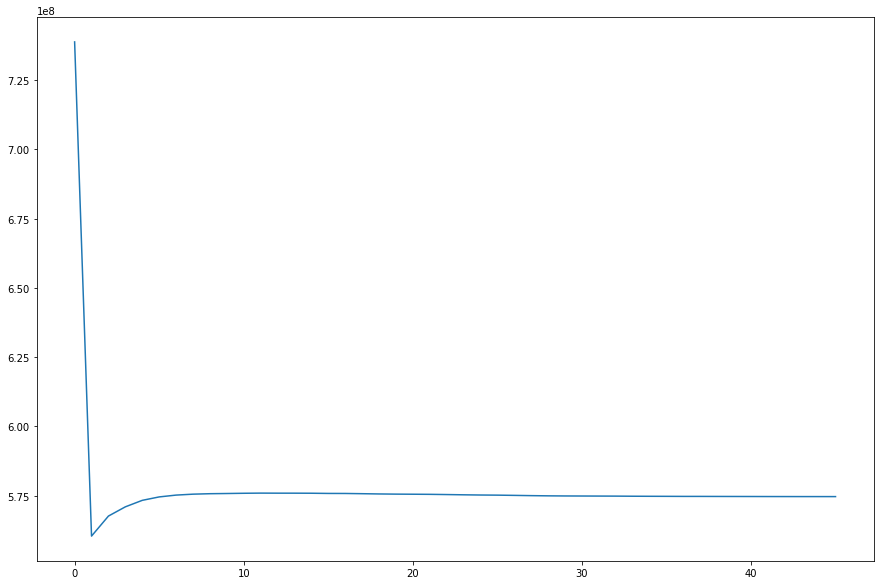

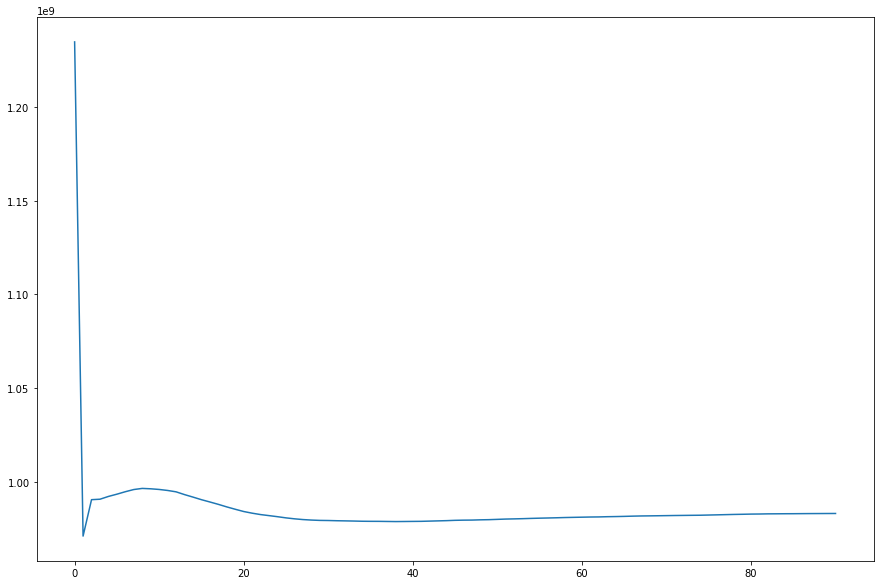

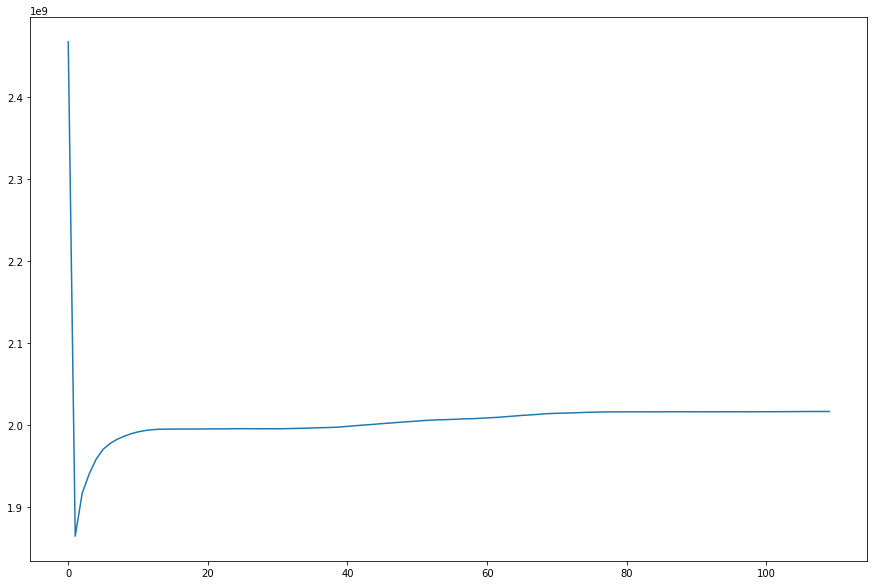

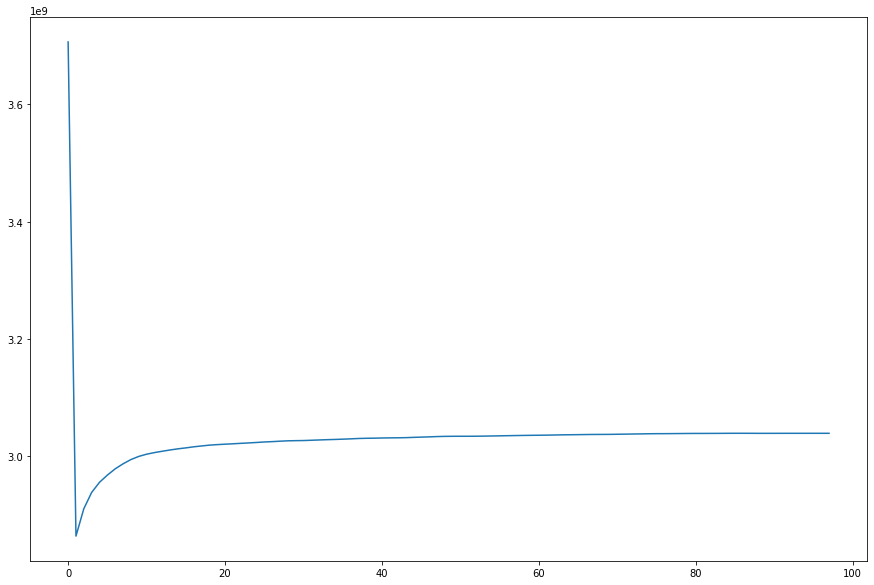

In [11]:
k_values = [3,5,10,15]
for index,model in enumerate(models):    
    print("****** Model",index+1,", K = ",k_values[index]," ******")
    print("The Model needed ",model.iter_num_," iterations to converge.")
    print("The Model scored ",model.distoration_measure_," for the distoration measure value.")
    model.plot_measure_vs_iteration()

### Advanced Experiments: Trying out re-running Kmeans with more 3 restarts
#### With  best preforming model from above.

In [ ]:
model = KMeans(num_clusters= 3, num_restarts = 3)
model.fit(train_X)
models.append(model)

#### Evaluating the expriement results: 
    Original run of Kmeans gave distoration measure of 574652597.7368706
    First restart of Kmeans gave distoration measure of 574559070.1893139
    Second restart of Kmeans gave distoration measure of 574655678.0976384
    Third restart of Kmeans gave distoration measure of 574655678.0976384
    
#### Notice that the changes in restarts doesn't wildely change the distoration measure. Only minor improvements are made.